# Course of Marielle Simon: Simple random walk

First, some python initializations.

In [3]:
%matplotlib inline
from matplotlib import rcParams
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
rcParams['figure.figsize'] = (8., 6.)  # Enlarge figure
rcParams['animation.html'] = 'html5'  # to render animation in notebook

import srw  # Import simple random walk module from srw.py

## Random walk on  $\mathbb{Z}^2$


Create and play a matplotlib animation for a $nstep$-step random walk starting at $(x, y) = (0, 0)$.

In [4]:
walk = srw.Walk2D(nstep=100)  # Create a 100-step random walk
anim = walk.generate_animation()
plt.close(anim._fig)  # Close the initial figure to display only the animation figure
anim  # Now play

Plot entire path for various $nstep$ values.

In [5]:
def plot_walk(nstep: int):
    srw.Walk2D(nstep).plot()

slider = IntSlider(min=100, max=20000, step=100, value=5000, continuous_update=False)
interact(plot_walk, nstep=slider);

interactive(children=(IntSlider(value=5000, continuous_update=False, description='nstep', max=20000, min=100, …

### Some quantities as a function of the number of steps

Compute average **final distance** over 1000 random walks.

In [ ]:
srw.FinalDistance(nwalk=1000).plot()

Compute average **maximum distance** over 1000 random walks.

In [ ]:
srw.MaxDistance(nwalk=1000).plot()

Compute the **number of times** the walk goes back to starting point (average over 1000 random walks).

In [ ]:
srw.BackToStart(nwalk=10000, nstepmax=10000).plot()

## Random walk on $\mathbb{Z}$

Consider the random walk on $\mathbb{Z}$ with $0 < p < 1$, denoted by $(S_n)$. The chain is supposed to start from state 0.

1\. Implement a function `random_walk_z` simulating the behaviour of the random walk for $n_{\max}$ steps, and represent it on a graph. Ensure that the function `random_walk_z`also returns: #
   - the number of times the chain is returned to the initial state;
   - the largest state reached by the chain.

In [6]:
import numpy as np
from sklearn.utils import check_random_state
from scipy.special import binom
import multiprocessing as mp
mp.set_start_method('spawn', True) # see https://github.com/microsoft/ptvsd/issues/1443
from numba import jit

@jit(nopython=True)
def count_first(item: int, vec: np.ndarray):
    """
    Find the index of the first element in the array `vec` equal to the element `item`. 
    """ 
    c = 0
    for i in range(len(vec)):
        if item == vec[i]:
            c += 1
    return c


def random_walk_z(p, n_max, random_state):
    """ Simulate a simple 1D random walk in Z.
    
    :returns:
        - Ti (:py:class:`int`) - number of returns to the initial state
        - state_max (:py:class:`int`) - farthest state reached by the chain (w.r.t the initial state)
    """

    rng = check_random_state(random_state)
    Z = 2*rng.binomial(1, p, size=(n_max)) - 1
    X = np.empty(shape=(n_max+1), dtype=float)
    X[0] = 0
    X[1:] = np.cumsum(Z)

    Ti = count_first(0, X[1:])
    id = np.argmax(np.abs(X))
    state_max = X[id]
    
    t = np.arange(0, n_max+1, 1)
    plt.plot(t, X)
    plt.show()
    return Ti, state_max

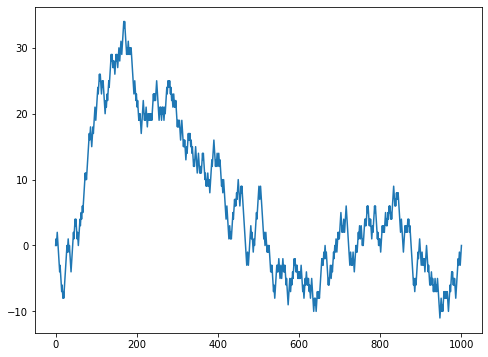

(40, 34.0)

In [7]:
random_walk_z(0.5, 1000, 500)

2\. Assume now that two players $A$ and $B$ play heads or tails, where heads occur with probability $p$. Player $A$ bets $1$ euro on heads at each toss, and $B$ bets $1$ euro on tails. Assume that: 
- the initial fortune of $A$ is $a \in \mathbb{N}$;
- the initial fortune of $B$ is $b\in\mathbb{N}$;
- the gain ends when a player is ruined.

Implement a function which returns the empirical frequency of winning for $A$, and compare it with the theoretical probability computed in the lecture.


In [ ]:
# Exercise